# BINA FS24: Leistungsnachweis
##Gruppe Francesca, Joris, Manuel & Ryan

**Wie schneidet die Schweiz im Vergleich zu anderen Nationen im OECD Better Life Index ab und welche Faktoren beeinflussen das Ergebnis der Schweiz?**

Im Rahmen der Arbeit möchten wir untersuchen, wie die Schweiz im Vergleich zu anderen Ländern im OECD Better Life Index abschneidet.

Dabei wird untersucht, wo sich die Schweiz in den untersuchten Jahren positioniert hat und welche Faktoren ein vermeintlich besseres oder schlechteres Abschneiden zum Vorjahr respektive zu den anderen Ländern beeinflussen. Abschliessend können darauf mögliche Massnahmen definiert werden.



# Step 1: Defining objectives and information needs

**Problemdefinition:**

Trotz des hohen Lebensstandards in der Schweiz und vielen Ländern der Europäischen Union (EU) variieren die Niveaus der Lebenszufriedenheit innerhalb dieser Regionen erheblich. Während finanzielle Sicherheit, Gesundheitsversorgung und Bildung oft als Kernindikatoren für Lebensqualität angesehen werden, gibt es eine Reihe weiterer Faktoren, die das Wohlbefinden und die Lebenszufriedenheit der Einwohner:innen beeinflussen können. Zu diesen Faktoren gehören soziale Beziehungen, Arbeitsbedingungen, Work-Life-Balance, Umweltqualität und persönliche Freiheiten. Es ist wichtig zu verstehen, welche Aspekte den grössten Einfluss auf die Lebenszufriedenheit haben, um politische und gesellschaftliche Massnahmen zu entwickeln, die das allgemeine Wohlbefinden fördern.

**Hypothesen:**


**Ziel der Untersuchung:**

Das Ziel ist es, zu verstehen, welche Faktoren die grösste Rolle in der Lebenszufriedenheit der Menschen in der Schweiz und der EU spielen und wie politische Massnahmen gestaltet werden können, um das Wohlbefinden zu verbessern. Es soll auch untersucht werden, welche Best Practices aus anderen Ländern übernommen werden können, um die Lebenszufriedenheit in der Schweiz weiter zu steigern.

**Vorgehen**

Benchmarking: Um die Positionierung und deren Entwicklung der Schweiz in ein Verhältnis zu setzen wird ein Benchmark erstellt. Daraus wird ersichtlich wo die Schweiz zum Zeitpunkt des Untersuchungsstart positioniert ist und wie sich die Positionierung im Laufe der Zeit verändert hat.

Untersuchung Benchmarking: Das erstellte Benchmarking wird anschliessend auf Auffälligkeiten untersucht. Jahre, in der die Schweiz vom Benchmark positiv sowie negativ auffällt, werden im Schritt drei genauer analysiert.

Auffälligkeiten untersuchen: Um herauszufinden, weshalb die Schweiz in einigen Jahren besser oder schlechter als der Benchmark abgeschnitten hat, werden die Daten des Bundesamtes für Statistik (BFS) im Zusammenhang mit der Zufriedenheit der Schweiz untersucht. Dabei werden die Jahre des auffälligen Abschneidens sowie die hervorgehenden Jahre berücksichtigt.

**What are our strategic aims?**

Welche Faktoren führten zu besonders guten oder schlechten Ergebnissen im OECD Better Life Index und was kann politisch sowie gesellschaftilch unternommen werden, um die Lebensqualität der Schweizer:innen zu erhöhen?

**What do we need to know and what questions need to be anwesered?**

Wie verändert sich die subjektive Wahrnehmung der Lebensqualität während des Untersuchungszeitraum in der Schweiz sowie den Teilnehmenden des OECD Better Life Indexes?

**Wie steht die Schweiz da im internationalen Vergleich (EU-Länder)?**

**Welche Faktoren waren ausschlaggebend für auffällige Resultate?**



**Who needs the information (leadership or business units)?**

Business Unit Level: Stadtplanung Behörde / Politik
Die Daten werden verwendet, um die städtische Entwicklung und Infrastrukturprojekte zu leiten, mi dem Ziel, die Lebensqualität zu verbessern.  

**What decision needs to be taken?**


# Step 2: Collecting data

OECD Better Life Index-Daten

BFS-Daten  

Gathering and organising the right data. Emphasis on finding meaningful and relevant data to meet the information needs identified in Step 1. Organisations need to either:

Assess whether the required data is already held somewhere in the organisation

Identify the best way to collect the data

**2.1 Supporting internal data with external data > provide internal & external**

**2.2 Balancing structured data (excel) with unstructured data (website, social media, video content)**

**2.3 Identifying data collection formats (activity data, conversation data, photo and video data, sensor data)**

# Step 3: Analyzing data
Die nächsten Schritte sind die Analyse der Daten und die Suche nach Erkenntnissen. In diesem Schritt probieren wir einige Korrelationsmatrizen aus und überprüfen, ob die Hypothesen richtig oder falsch sind. Wir wählen die Korrelationen, die wir analysieren wollen, anhand der Diagramme aus einer früheren Phase aus.

Once the right data has been collected, it must be turned into insights. To do this, the data must be analysed to extract information.

**3.1 Looking at the different analytics option (correlation, regression, data mining, text analytics, image analytics, sound and voice analytics, sentiment analysis, AI and advanced analytics, augmented analytics)**

**3.2 Combining analytics for maximum effect > work with 2 techniques.**

Die Daten werden aus einer CSV-Datei von einer URL geladen und verarbeitet, um Rankings für verschiedene Kategorien zu berechnen. Zunächst werden die relevanten Kategorien extrahiert, und diejenigen, die als irrelevant betrachtet werden, werden ausgeschlossen. Die Daten werden dann für jede Kategorie in temporäre Dateien geschrieben, um eventuell überprüft zu werden.

Der Hauptteil des Codes berechnet den Durchschnittswert für jede Messung pro Land und bestimmt anhand dieser Durchschnittswerte das Ranking. Es wird zwischen Kategorien unterschieden, bei denen eine umgekehrte Rangfolge angewendet wird (kleinerer Wert = höheres Ranking) und solchen, bei denen die normale Rangfolge angewendet wird. Schliesslich werden die Rankings für alle Kategorien gesammelt und sortiert ausgegeben.

In [2]:
import pandas as pd
import tempfile
import os
import numpy as np

csv_url = 'https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/oecd_data_2007bis2022.csv'
#csv_url = 'https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/ryan_test.csv'
df = pd.read_csv(csv_url, delimiter=';')

# using unique measurements (e.g. 1_1, 1_2 etc.)
raw_categories = df['MEASURE'].unique()
categories = [x for x in raw_categories if str(x) != 'nan'] #removed country "nan" from list

# reverse ranking means that a measurement with a small value has a higher ranking than one with a large value
categories_reverse_ranking = ["1_2", "2_8_DEP", "2_8_VER", "11_1_VER", "11_1_DEP","11_2",
                              "2_4","7_3_VER", "7_3_DEP", "4_4_VER", "4_4_DEP",
                              "2_5", "3_1", "3_3", "3_4", "2_3", "1_4","1_5",
                              "1_6", "9_2", "5_2_DEP", "5_3", "5_4", "7_1_DEP",
                              "8_1_DEP", "10_1", "10_2_DEP", "10_3","2_2", "2_7"]

irrelevant_categories = ["4_1", "4_2", "4_3", "6_1_DEP", "6_1_VER", "6_2_DEP",
                         "6_2_VER", "6_3_DEP", "6_3_VER", "6_4", "6_4_DEP",
                         "6_4_VER", "6_5", "6_5_DEP", "6_5_VER", "7_2", "8_1",
                         "1_3", "1_3_VER", "1_6","2_6", "5_4", "8_1_DEP",'2_4']

category_rules = {}
all_category_rankings = []

temp_dir = tempfile.mkdtemp()

for category in categories:
  category_df = df[df['MEASURE'] == category]
  if category in irrelevant_categories:
    continue
  #-----STEP 0 -------------------------------------------------------------
  # write temp. files for eventual checks
  temp_file_path = os.path.join(temp_dir, f'{category}.csv')
  category_df.to_csv(temp_file_path, index=False)
  #print(f"Data for category {category} written to {temp_file_path}")
  #------------------------------------------------------------------

  #-----STEP 1 -------------------------------------------------------------
  # collect data and transform to correct rating
  country_means = {}
  countries = category_df['Reference area'].unique()
  # collect means of each country per measurement
  for country in countries:
    country_df = category_df.loc[df['Reference area'] == country]
    try:
      avg_value = country_df['OBS_VALUE'].mean()
    except Exception as e:
      print("Error while calculating mean for {} and {}".format(country, category))
      raise

    country_means[country] = avg_value

  #-----STEP 2 -------------------------------------------------------------
  # calculate ranking with min & max value
  average_values = list(country_means.values())
  # get min and max per measurement
  min_value = np.nanmin(average_values)
  max_value = np.nanmax(average_values)
  category_rules[category] = {'min': min_value, 'max': max_value}

  min = category_rules[category]["min"]
  max = category_rules[category]["max"]

  #print("------------{}-----------".format(category))

  measurement_ranking = []
  if category in categories_reverse_ranking:
    for key, value in country_means.items():
        #print(key)
        #print("Value: {}".format(value))
        #print("Min: {}".format(min))
        #print("Max: {}".format(max))
        ranking = (value-max)/(min-max)*9+1
        measurement_ranking.append({key:ranking})
        #print("Ranking: {}".format(ranking))
        #print("----")
  else:
    #print("---- KATEGORIE: {}".format(category))
    for key, value in country_means.items():
        #print(key)
        #print("Value: {}".format(value))
        #print("Max: {}".format(max))
        #print("Min: {}".format(min))
        ranking = (value-min)/(max-min)*9+1
        measurement_ranking.append({key:ranking})
        #print("Ranking: {}".format(ranking))
        #print("----")
  #print(category)
  #print(measurement_ranking)

  all_category_rankings.append({category:measurement_ranking})

all_category_rankings_sorted = sorted(all_category_rankings, key=lambda x: list(x.keys()))
for ranking in all_category_rankings_sorted:
  print(ranking)


{'10_1': [{'Austria': 9.66620879120879}, {'Spain': 9.418956043956044}, {'Netherlands': 9.233516483516484}, {'Slovak Republic': 9.015934065934065}, {'Finland': 7.8303571428571415}, {'Belgium': 8.580357142857142}, {'Poland': 8.971999154691463}, {'Portugal': 8.868818681318682}, {'Luxembourg': 9.291525781910396}, {'Slovenia': 9.307692307692307}, {'Sweden': 8.969780219780219}, {'Ireland': 9.27554945054945}, {'Greece': 8.545963651732881}, {'Switzerland': 9.704247675401522}, {'France': 9.549325674325674}, {'Israel': 7.36675824175824}, {'Denmark': 9.402472527472527}, {'United Kingdom': 10.0}, {'Latvia': 1.0}, {'Lithuania': 2.86675824175824}, {'Iceland': 9.611052409129332}, {'Germany': 9.740384615384615}, {'Türkiye': 7.998626373626372}, {'Czechia': 9.282967032967033}, {'Estonia': 3.657967032967031}, {'Hungary': 8.319632290786137}, {'Norway': 9.154395604395605}, {'Italy': 9.329045954045954}]}
{'10_2': [{'Slovak Republic': 3.8901420423878235}, {'Austria': 8.091275695626026}, {'Netherlands': 7.772

In [3]:
# category range is 1 to 11
all_results = {}
for i in range(1, 12):
  category_country_result = {}
  def add_to_dict(key, value):
      if key not in category_country_result:
          category_country_result[key] = [value]
      else:
          category_country_result[key].append(value)

  for item in all_category_rankings_sorted:
    for key in item.keys():
      if key.startswith("{}_".format(i)):
        item[key]
        for idx, ele in enumerate(item[key]):
          for key, value in ele.items():
            add_to_dict(key, value)

  result = []
  #print("+++++++++++++++++++++++ {} ++++++++++++++++++++++".format(i))
  for key, value in category_country_result.items():
    #print(key)
    #print(value)
    #print("---")
    mean = np.mean(value)
    result.append({key:mean})

  all_results[i] = result

all_results_list = [all_results]

for key, value in all_results.items():
  print("Kategorie: {}".format(key))
  print(value)
  print("---")

Kategorie: 1
[{'Germany': 8.026508968788846}, {'Belgium': 8.14168377474946}, {'Poland': 5.954819231219609}, {'Latvia': 3.049732915280879}, {'Finland': 8.615457288498524}, {'Netherlands': 8.012413127978999}, {'France': 7.690764321371833}, {'Switzerland': 8.165958457260638}, {'Ireland': 6.7754504511495695}, {'Estonia': 4.680007309726992}, {'Norway': 8.677543596618062}, {'Italy': 5.13815316878166}, {'Hungary': 5.891186404792151}, {'Spain': 4.600737325511579}, {'Czechia': 7.612572551520042}, {'Denmark': 8.698202415330794}, {'Austria': 8.015921228181458}, {'United Kingdom': 6.042660560470188}, {'Slovak Republic': 6.720010603247958}, {'Lithuania': 4.155325876806701}, {'Greece': 3.2337373682702513}, {'Luxembourg': 8.148430994693737}, {'Portugal': 4.906335167286509}, {'Slovenia': 7.094269794759826}, {'Sweden': 8.10401113760906}, {'Iceland': 9.315060348969627}, {'Israel': 4.043087069254503}, {'Türkiye': 2.5744470234460484}]
---
Kategorie: 2
[{'Greece': 4.455759491508081}, {'Norway': 9.136322894

Dieser Codeteil definiert die Gruppierung von Ländern in verschiedene geografische Regionen in Europa und legt Farben für diese Gruppen fest. Die Länder werden somit in Cluster eingeteilt.

In [4]:
switzerland = ['Switzerland']
northern_countries = ['Norway','Finland','Denmark','Sweden','Iceland']
southern_countries = ['Italy','Spain','Portugal']
western_countries = ['Netherlands','France','Belgium','Ireland','United Kingdom','Luxembourg','Austria','Germany']
eastern_countries = ['Greece','Israel','Türkiye','Czechia','Hungary','Poland','Slovenia','Slovak Republic','Latvia','Estonia','Lithuania']

def get_color_legends():
  return "Switzerland: red\nNothern countries: green\nSouthern countries: orange\nMiddle countries: blue\nWestern countries: purple\nEastern countries: grey"

def get_country_color(country):
  if country in switzerland:
    return 'red'
  elif country in northern_countries:
    return "green"
  elif country in southern_countries:
    return "orange"
  elif country in western_countries:
    return "blue"
  elif country in eastern_countries:
    return "grey"
  else:
    return "black"

# Step 4: Presenting information

## Ranking der Länder pro Messwert
Auf Basis der zusammengefassten Werte pro Kategorie können wir Grafiken pro Kategorie erstellen. Dieser Python-Code verwendet matplotlib, um eine Reihe von Liniendiagrammen zu erstellen, die die Rankings von Ländern in verschiedenen Kategorien darstellen. Die Kategorien beziehen sich auf verschiedene Aspekte des Wohlstands und der Lebensqualität, wie Einkommen, Gesundheit und Sicherheit. Die Länder werden entsprechend ihrer geografischen Regionen farblich gekennzeichnet. Die Schweiz wird mit der Farbe rot markiert.

---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


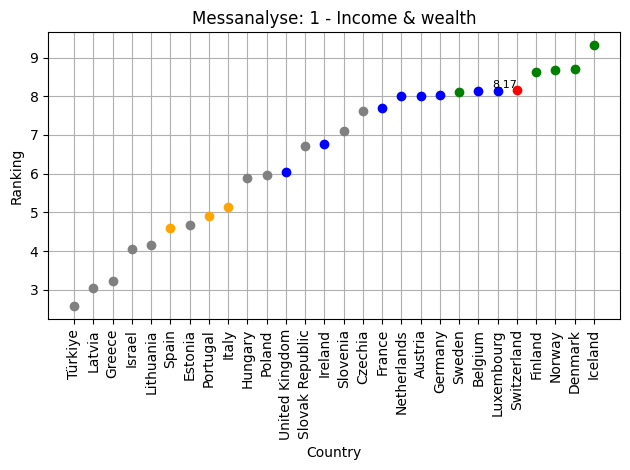


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


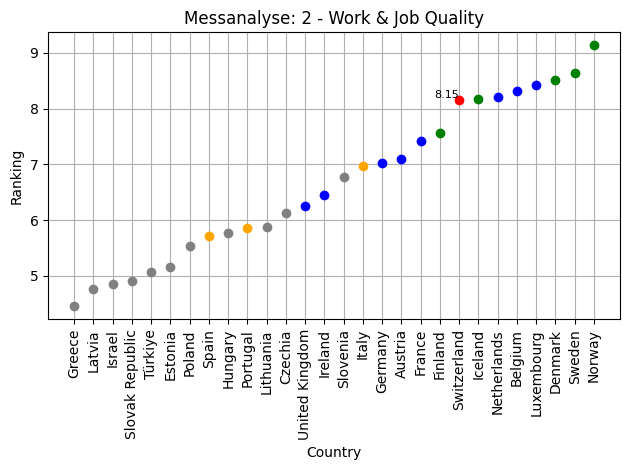


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


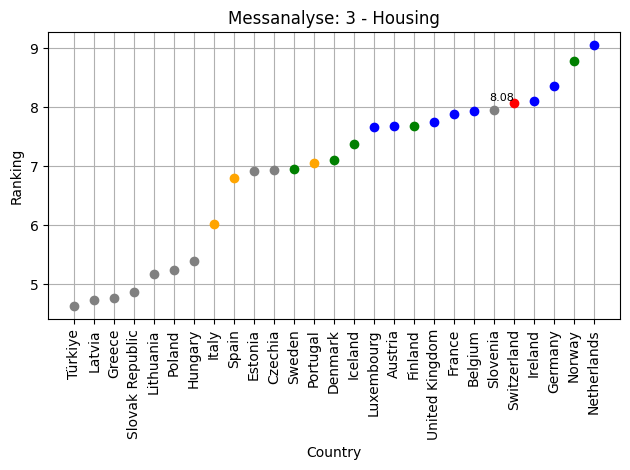


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


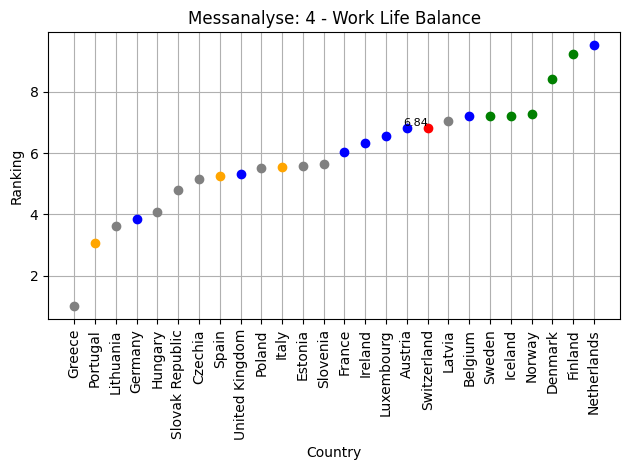


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


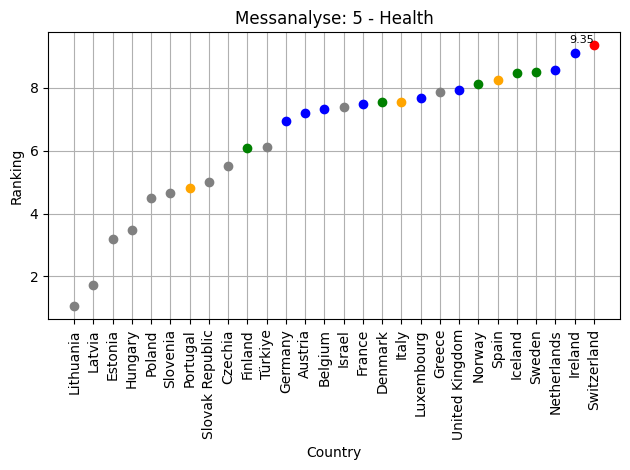


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


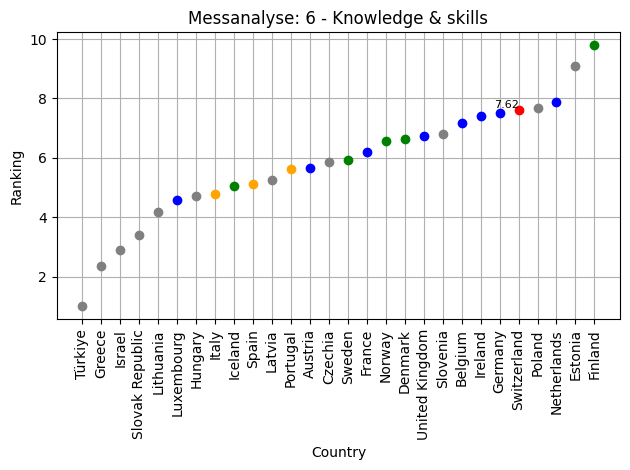


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


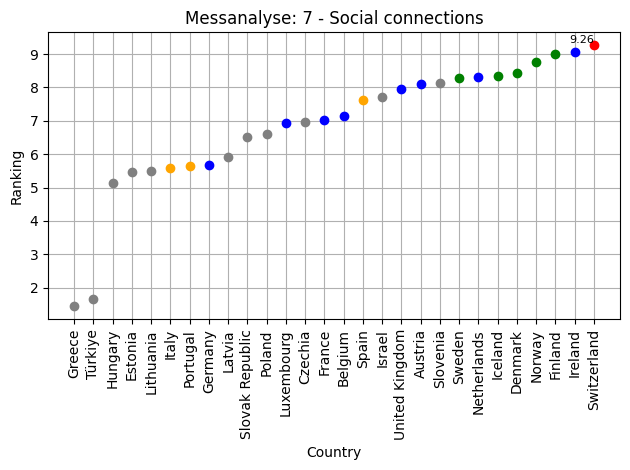


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


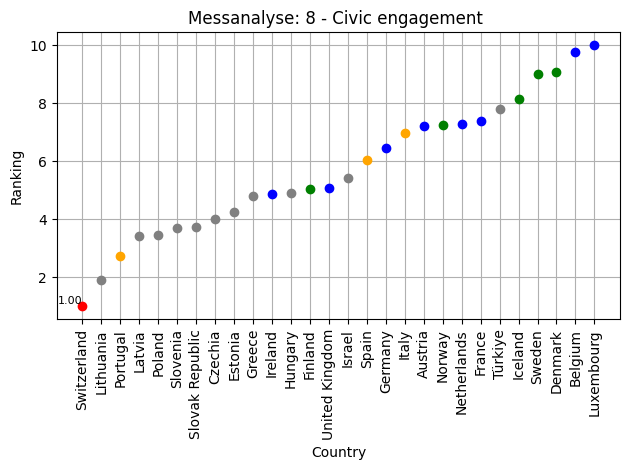


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


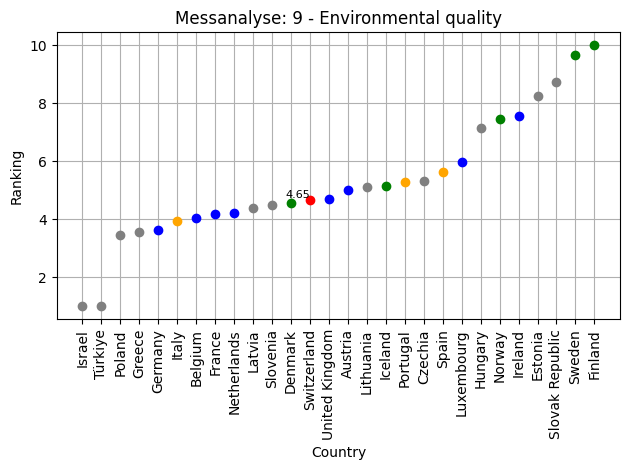


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


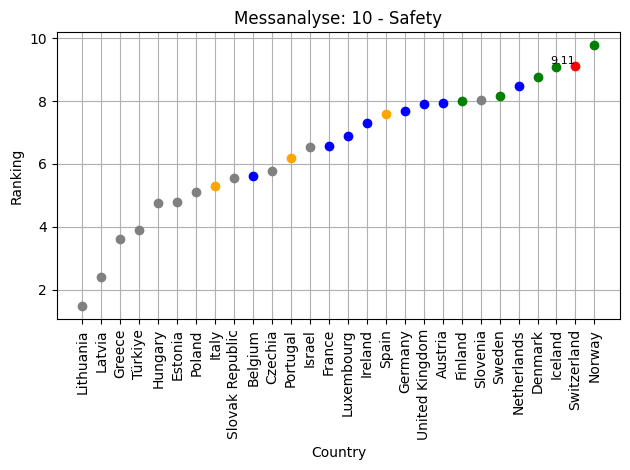


---Color codes---
Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


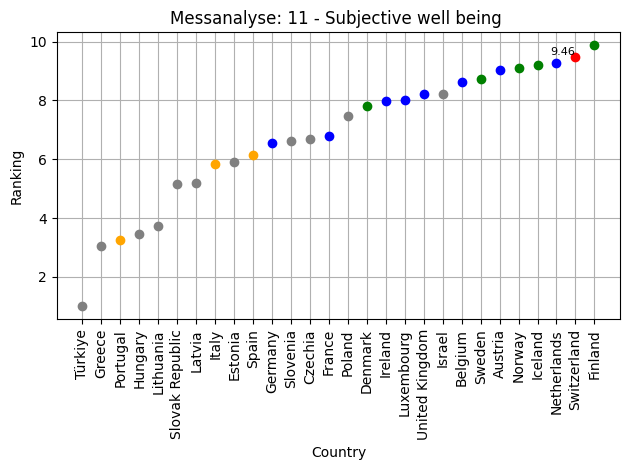

In [5]:
import matplotlib.pyplot as plt

cat_names = {
    "1":"Income & wealth",
    "2":"Work & Job Quality",
    "3":"Housing",
    "4":"Work Life Balance​",
    "5":"Health",
    "6":"Knowledge & skills",
    "7":"Social connections​",
    "8":"Civic engagement ​",
    "9":"Environmental quality​",
    "10":"Safety",
    "11":"Subjective well being "
}

for cat, country_rankings in all_results.items():
  countries = []
  rankings = []
  for ranking in country_rankings:
    country = list(ranking.keys())[0]
    rank = ranking[country]
    countries.append(country)
    rankings.append(rank)
  # Sort rankings and corresponding countries
  sorted_data = sorted(zip(rankings, countries), reverse=True)

  sorted_rankings, sorted_countries = zip(*sorted_data)

  #Plot the line plot with markers
  for i, (country, rank) in enumerate(zip(sorted_countries, sorted_rankings)):
      country_color = get_country_color(country)
      if country == 'Switzerland':
          plt.plot(country, rank, marker='o', color='red', label=country)
          plt.text(country, rank, f'{rank:.2f}', ha='right', va='bottom', fontsize=8)
      else:
          plt.plot(country, rank, marker='o', color=country_color, label=country)

  print("---Color codes---")
  print(get_color_legends())
  plt.xlabel('Country')
  plt.ylabel('Ranking')
  plt.title('Messanalyse: {} - {}'.format(cat, cat_names.get(str(cat))))
  plt.grid(True)
  plt.xticks(rotation=90)
  plt.gca().invert_xaxis()
  plt.tight_layout()
  plt.show()
  print("")


Diese Diagramme geben einen Überblick über die verschiedenen Rankings pro Kategorie. Das ist optional, falls man mehr Details pro Kategorie sehen möchte. Wenn man die Diagramme sehen möchte, muss man "show" in der ersten Codezeile auf "False" ändern, dann werden die Diagramme angezeigt!

In [8]:
show = False

In [9]:
import matplotlib.pyplot as plt

if show:
  for idx, data in enumerate(all_category_rankings_sorted):
      for key, value in data.items():
          countries = []
          rankings = []

          for entry in value:
              country = list(entry.keys())[0]
              rank = entry[country]
              countries.append(country)
              rankings.append(rank)

          # Sort rankings and corresponding countries
          sorted_data = sorted(zip(rankings, countries), reverse=True)

          sorted_rankings, sorted_countries = zip(*sorted_data)

          #Plot the line plot with markers
          for i, (country, rank) in enumerate(zip(sorted_countries, sorted_rankings)):
              country_color = get_country_color(country)
              if country == 'Switzerland':
                  plt.plot(country, rank, marker='o', color=country_color, label=country)
                  plt.text(country, rank, f'{rank:.2f}', ha='right', va='bottom', fontsize=8)
              else:
                  plt.plot(country, rank, marker='o', color=country_color, label=country)

      print("---Color codes---")
      print(get_color_legends())
      plt.xlabel('Country')
      plt.ylabel('Ranking')
      plt.title('Country Rankings: {}'.format(key))
      plt.grid(True)
      #plt.legend(title='Data Set', loc='upper left')
      plt.xticks(rotation=90)
      #plt.gca().invert_yaxis()
      plt.gca().invert_xaxis()
      plt.tight_layout()
      plt.show()


## Korrelation der Messwerte im Vergleich zur subjektiven Lebenszufriedenheit
Dieser Python-Code verwendet numpy, statsmodels, seaborn und matplotlib, um Scatterplots (Streudiagramme) für die Korrelation zwischen verschiedenen Kategorien in einem Datensatz zu erstellen. Der Code sammelt Rankings von Ländern in verschiedenen Kategorien und erstellt Scatterplots für alle möglichen Kombinationen von Kategorien.

**Kategorien:**
    
*   "1":"Income & wealth"
*   "2":"Work & Job Quality"
*   "3":"Housing"
*   "4":"Work Life Balance​"
*   "5":"Health"
*   "6":"Knowledge & skills"
*   "7":"Social connections​"
*   "8":"Civic engagement ​"
*   "9":"Environmental quality​"
*   "10":"Safety"
*   "11":"Subjective well being"
  

**THE FOLLOWING CODE IS TO BE DELETED**

In [11]:
# -------- TO BE DELETED - OBSOLET DURCH NACHFOLGENDE SEABORN PLOTS!!! ---------
"""
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from itertools import combinations

# correlation combinations of two categories
#corr_combinations = {3:1, 4:1, 6:1, 11:1, 11:2, 11:4}
corr_combinations = {1:11, 2:11, 3:11, 5:11, 6:11, 7:11, 8:11, 9:11, 10:11, 4:11}

countries = set()
country_rankings_all = []

for cat, rankings in all_results.items():
  for each in rankings:
    countries.add(list(each.keys())[0])

for country in countries:
  country_dict = {}
  def add_to_dict(key, value):
    if key not in category_country_result:
      country_dict[key] = value
    else:
      country_dict[key].append(value)

  #print(country)
  for cat, rankings in all_results.items():
    #print(cat)
    value = [item.get(country) for item in all_results.get(cat) if country in item]
    if value:
      add_to_dict(cat, value[0])
      #country_rankings_all.append({country:{cat:value[0]}})
    else:
      add_to_dict(cat, None)
      #country_rankings_all.append({country:{cat:None}})
  country_rankings_all.append({country:country_dict})


# print using dataset for checks
#for ctry in country_rankings_all:
  #print(ctry)


for corr1_key, corr2_key in corr_combinations.items():
  print(corr1_key)
  print(corr2_key)
  corr1_values = []
  corr2_values = []

  for country in country_rankings_all:
    for ctry, value in country.items():
      corr1_value = value.get(corr1_key)
      corr2_value = value.get(corr2_key)

      if corr1_value and corr2_value:
        corr1_values.append(corr1_value)
        corr2_values.append(corr2_value)
        country_color = get_country_color(ctry)
        if ctry == 'Switzerland':
            plt.scatter(corr2_value, corr1_value, color='red', marker='o', s=90)
        else:
            plt.scatter(corr2_value, corr1_value, color=country_color, marker='o', s=90)

        #plt.scatter(corr2_value, corr1_value, color='blue', marker='o', s=90)
      else:
        print("Not using {} due to missing values: {} = {} & {} = {}".format(ctry, corr2_key, corr2_value, corr1_key, corr1_value))

  #print("X: {}".format(corr2_values))
  #print("Y: {}".format(corr1_values))

  #----------------Linear regression line----------------------
  # Convert to numpy arrays
  x = np.array(corr2_values)
  y = np.array(corr1_values)

  # Perform linear regression
  slope, intercept = np.polyfit(x, y, 1)
  regression_line = slope * x + intercept

  # Overlay linear regression line
  plt.xlim(0, 10)
  plt.ylim(0, 10)
  plt.plot(x, regression_line, color='red', label='Linear Regression')
  #-------------------------------------------------------------

  # Adding title and labels
  plt.grid(True)
  plt.title('X = {}, Y = {}'.format(cat_names.get(str(corr2_key)), cat_names.get(str(corr1_key))))

  plt.legend()

  print("---Color codes---")
  print(get_color_legends())

  # Displaying the plot
  plt.show()
  print("")
"""

'\nimport numpy as np\nimport statsmodels.api as sm\nimport seaborn as sns\nfrom itertools import combinations\n\n# correlation combinations of two categories\n#corr_combinations = {3:1, 4:1, 6:1, 11:1, 11:2, 11:4}\ncorr_combinations = {1:11, 2:11, 3:11, 5:11, 6:11, 7:11, 8:11, 9:11, 10:11, 4:11}\n\ncountries = set()\ncountry_rankings_all = []\n\nfor cat, rankings in all_results.items():\n  for each in rankings:\n    countries.add(list(each.keys())[0])\n\nfor country in countries:\n  country_dict = {}\n  def add_to_dict(key, value):\n    if key not in category_country_result:\n      country_dict[key] = value\n    else:\n      country_dict[key].append(value)\n\n  #print(country)\n  for cat, rankings in all_results.items():\n    #print(cat)\n    value = [item.get(country) for item in all_results.get(cat) if country in item]\n    if value:\n      add_to_dict(cat, value[0])\n      #country_rankings_all.append({country:{cat:value[0]}})\n    else:\n      add_to_dict(cat, None)\n      #countr

1 Income & wealth
2 Work & Job Quality
3 Housing
4 Work Life Balance​
5 Health
6 Knowledge & skills
7 Social connections​
8 Civic engagement ​
9 Environmental quality​
10 Safety
11 Subjective well being 

Switzerland: red
Nothern countries: green
Southern countries: orange
Middle countries: blue
Western countries: purple
Eastern countries: grey


KeyboardInterrupt: 

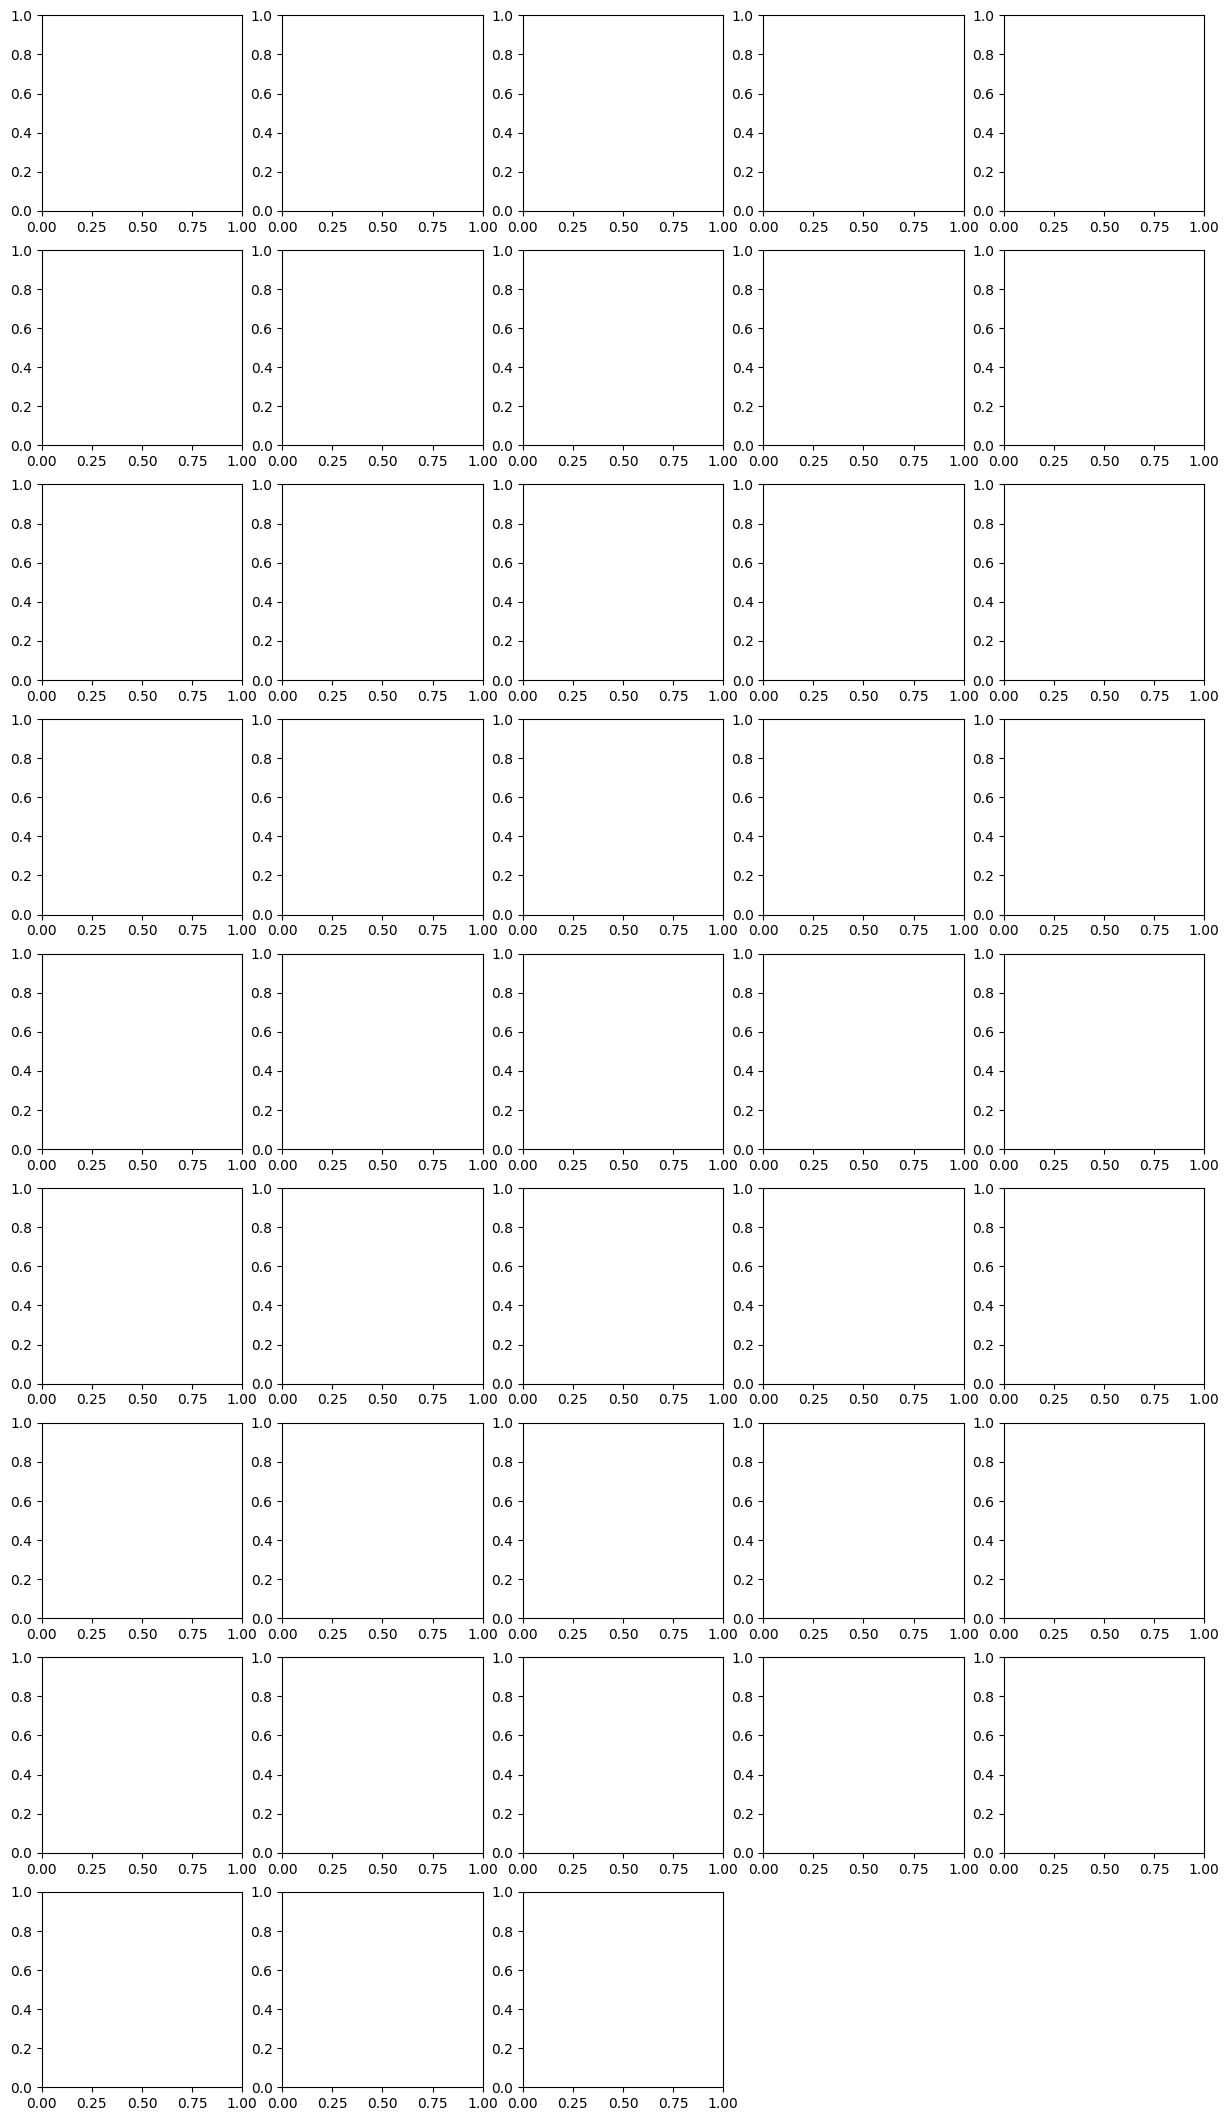

In [12]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Annehmen, dass all_results, cat_names und get_country_color vorher definiert sind
countries = set()
country_rankings_all = []

for cat, rankings in all_results.items():
    for each in rankings:
        countries.add(list(each.keys())[0])

for country in countries:
    country_dict = {}
    def add_to_dict(key, value):
        if key not in country_dict:
            country_dict[key] = value
        else:
            country_dict[key].append(value)

    for cat, rankings in all_results.items():
        value = [item.get(country) for item in all_results.get(cat) if country in item]
        if value:
            add_to_dict(cat, value[0])
        else:
            add_to_dict(cat, None)
    country_rankings_all.append({country: country_dict})

for cat, value in cat_names.items():
    print(cat, value)
print("")
print(get_color_legends())

# adding up the collected values to create a pandas dataframe
combined_data = {}
for ctry in country_rankings_all:
    combined_data.update(ctry)
df = pd.DataFrame(combined_data, index=range(1, 12))

def plot_scatterplots_per_category_combination(df):
    combinations_list = list(combinations(df.index, 2))

    # show 5 plots next to each other on one line so that we have a better view of all of the correlation plots
    num_plots = len(combinations_list)
    num_columns = 5
    num_rows = (num_plots // num_columns) + (num_plots % num_columns > 0)
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
    axes = axes.flatten()

    # iterate through the combinations and create a scatterplot per combination
    for i, (cat1, cat2) in enumerate(combinations_list):
        ax = axes[i]
        x_values = []
        y_values = []
        for country in df.columns:
            x_value = df.loc[cat1, country]
            x_values.append(x_value)
            y_value = df.loc[cat2, country]
            y_values.append(y_value)
            country_color = get_country_color(country)
            ax.scatter(x=x_value, y=y_value, label=country, color=country_color)

        sns.regplot(x=x_values, y=y_values, ax=ax, ci=None, scatter=False, color='grey')
        ax.set_xlabel(f'{cat_names.get(str(cat1))}', fontsize=9)
        ax.set_ylabel(f'{cat_names.get(str(cat2))}', fontsize=9)
        ax.set_title(f'Correlation of {cat_names.get(str(cat1))} to {cat_names.get(str(cat2))}', fontsize=9)

    fig.tight_layout()

plot_scatterplots_per_category_combination(df)



Wir haben eine Korrelation zwischen der Kategorie 'Subjective well-being' und den folgenden anderen Kategorien festgestellt:
*   Income & Wealth
*   Work & Job Quality
*   Housing
*   Social connections
*   Safety
*   Work Life Balance


## Deep Dive in spezifische Kategorien auf Jahresbasis
Die Schweiz schneidet in den meisten Kategorien im Vergleich zu den restlichen europäischen Ländern sehr gut ab. Daher ist es besonders interessant, jene Kategorien näher zu betrachten, in denen die Schweiz im Vergleich zu unseren europäischen Nachbarn nicht so gut abschneidet. Wie oft in politischen Diskussionen erwähnt wird, vergleichen wir uns gerne mit unseren skandinavischen Freunden. Deshalb werden wir die Kategorien genauer betrachten, in denen wir schlechter abschneiden als sie.


Dieser Python-Code verarbeitet Daten, um die jährlichen Werte für bestimmte Kategorien von Ländern zu transformieren und zu analysieren. Die relevanten Kategorien und Länder (nordische Länder und die Schweiz) werden ausgewählt, und die Werte werden basierend auf den minimalen und maximalen Werten in Ranglisten transformiert.

In [ ]:
relevant_cat = ['1_1','1_2','1_4','1_5','2_1','2_2','2_3','2_5','2_7','2_8','2_8_DEP','2_8_VER']#,   '2_2','2_4','2_5',]

# '2_2','2_4','2_5', '2_8_DEP','2_8_VER'

peers = northern_countries + switzerland

all_country_year_values = []

for category in categories:
  category_df = df[df['MEASURE'] == category]
  if category not in relevant_cat:
    continue

  #print("----- {} ------".format(category))

  #-----STEP 0 -------------------------------------------------------------
  # we need to calc the average of all countries and get the min/max values so we can
  # transform the values for each year into the correct transformed "ranking".
  # we need to this step so that the shown values are representative in the same way as
  # already shown graphs and values

  cat_values_min = {}
  cat_values_max = {}
  countries = category_df['Reference area'].unique()


  min_value = category_df['OBS_VALUE'].min()
  max_value = category_df['OBS_VALUE'].max()
  category_rules[category] = {'min': min_value, 'max': max_value}
  min = category_rules[category]["min"]
  max = category_rules[category]["max"]

  #print("CATEGORY: {}".format(category))
  #-----STEP 1 -------------------------------------------------------------
  # collect the values for each year and transform to correct rating with
  # the min/max values we collected in the Step 0
  country_year_values_transformed = {}
  def add_to_dict(key, value):
    if key not in country_year_values_transformed:
      country_year_values_transformed[key] = [value]
    else:
      country_year_values_transformed[key].append(value)

  years = category_df['TIME_PERIOD'].unique()
  # collect means of each country per measurement
  country_list = []
  for country in countries:

    #we only want to collect data from our peers (northern countries)
    if country not in peers:
      continue

    country_dict = {"country":country}
    country_df = category_df.loc[df['Reference area'] == country]
    for year in years:
      year_df = country_df.loc[df['TIME_PERIOD'] == year]
      if not year_df.empty:
        year_value = year_df['OBS_VALUE'].iloc[0]
        #print("Before: {}: {} - min: {} & max: {}".format(year, year_value, min, max))
        transformed_value = None

        if category in categories_reverse_ranking:
          transformed_value = (year_value-max)/(min-max)*9+1
          #print("{} - Transformed to ranking: {}: {}".format(country, year, transformed_value))
        else:
          transformed_value = (year_value-min)/(max-min)*9+1
          #print("{} - Transformed to ranking: {}: {}".format(country, year, transformed_value))

        country_dict.update({year:transformed_value})
      #print("--")
    add_to_dict(category, country_dict)

  all_country_year_values.append(country_year_values_transformed)
  #print("----------")

for cvyv in all_country_year_values:
  print(cvyv)


{'1_1': [{'country': 'Finland', 2007: 5.223285585557592, 2008: 5.367026069664108, 2009: 5.393592890656558, 2010: 5.550476959885653, 2011: 5.573128670416058, 2012: 5.532020010564584, 2013: 5.496504365658889, 2014: 5.426591678836653, 2015: 5.490911350713109, 2016: 5.6201099959606005, 2017: 5.682192461858746, 2018: 5.82089923251406, 2019: 5.987571077898269, 2020: 5.9998757107789835, 2021: 6.110337755958114}, {'country': 'Switzerland', 2007: 7.340801044029457, 2008: 7.358698691855948, 2009: 7.419103253270361, 2010: 7.513904856601311, 2011: 7.539632725351894, 2012: 7.692042382624367, 2013: 7.851722959326353, 2014: 7.900661840101917, 2015: 7.956591989559706, 2016: 8.000776807631357, 2017: 7.861790386228754, 2018: 7.853680514557375, 2019: 7.988751825497934, 2020: 8.251623527949539, 2021: 8.336357704378088}, {'country': 'Norway', 2007: 5.601932697386819, 2008: 5.740919118789423, 2009: 5.977224000248579, 2010: 6.099151726066557, 2011: 6.28036541030979, 2012: 6.496535437964143, 2013: 6.676071217

searching for Norway
{2007: 7.727596783476018, 2008: 8.151031410132138, 2009: 8.284822304409971, 2010: 8.310046083690551, 2011: 8.288664722142665, 2012: 8.262163750795384, 2013: 8.345933565300477, 2014: 8.336809340334959, 2015: 8.308338964062854, 2016: 8.340190202615073, 2017: 8.279579582421992, 2018: 8.263124833661845, 2019: 8.263697053805075, 2020: 8.269696626223134, 2021: 7.820674890470124}
searching for Finland
{2007: 7.90716650508505, 2008: 7.912816300024723, 2009: 8.124199853098922, 2010: 8.145363805188804, 2011: 8.090741406734448, 2012: 8.284635437423756, 2013: 8.146870656632112, 2014: 8.204107158839598, 2015: 8.307415337678277, 2016: 8.417772064207542, 2017: 8.31940681111686, 2018: 8.297425895085038, 2019: 8.344922660778915, 2020: 8.530770558129529, 2021: 8.345899656380833}
searching for Denmark
{2007: 7.266961467977287, 2008: 7.173393595592596, 2009: 7.173330712170483, 2010: 7.313104981160726, 2011: 8.272228835876085, 2012: 8.328747902197218, 2013: 8.261185482326614, 2014: 8.2

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


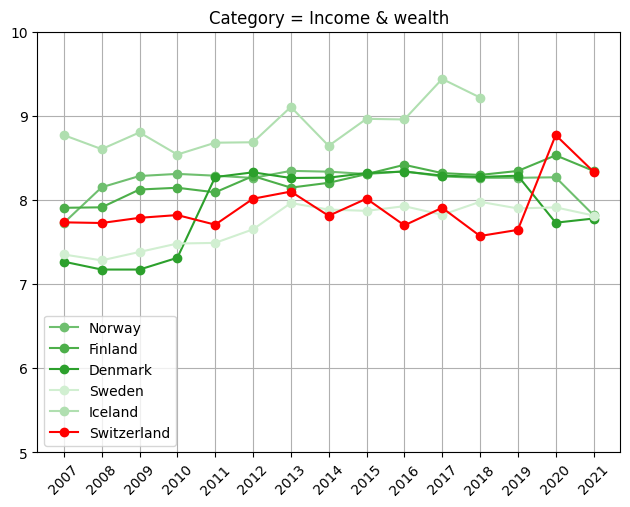

-----
searching for Norway
{2007: 8.680818283108122, 2008: 8.733701158469938, 2009: 8.741491882780261, 2010: 8.763869371984098, 2011: 8.79103686735893, 2012: 8.887692552610273, 2013: 8.843221600367098, 2014: 8.867208635184738, 2015: 8.726078319526591, 2016: 8.71325434187576, 2017: 8.654486639836813, 2018: 8.7275011710887, 2019: 8.866052519872413, 2020: 8.818484699092677, 2021: 8.838085837160778}
searching for Finland
{2007: 7.485190224432332, 2008: 7.517878730176524, 2009: 7.490757738121275, 2010: 7.5257471213324205, 2011: 7.506178057029078, 2012: 7.560378715782948, 2013: 7.4565520386302815, 2014: 7.501859896657976, 2015: 7.5626965244672, 2016: 7.711335644847434, 2017: 7.374900510097665, 2018: 7.440165222784635, 2019: 7.527229555423361, 2020: 7.695191174015304, 2021: 7.553231430324912}
searching for Denmark
{2007: 8.402631032973382, 2008: 8.397049593863882, 2009: 8.295559137193385, 2010: 8.179466389392562, 2011: 8.185071643344596, 2012: 8.212140003635573, 2013: 8.238664729213433, 2014:

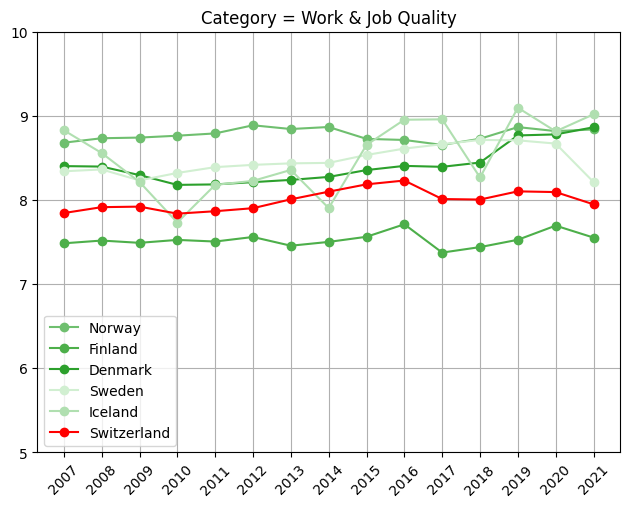

-----
1
{'Norway': {2007: 7.727596783476018, 2008: 8.151031410132138, 2009: 8.284822304409971, 2010: 8.310046083690551, 2011: 8.288664722142665, 2012: 8.262163750795384, 2013: 8.345933565300477, 2014: 8.336809340334959, 2015: 8.308338964062854, 2016: 8.340190202615073, 2017: 8.279579582421992, 2018: 8.263124833661845, 2019: 8.263697053805075, 2020: 8.269696626223134, 2021: 7.820674890470124}, 'Finland': {2007: 7.90716650508505, 2008: 7.912816300024723, 2009: 8.124199853098922, 2010: 8.145363805188804, 2011: 8.090741406734448, 2012: 8.284635437423756, 2013: 8.146870656632112, 2014: 8.204107158839598, 2015: 8.307415337678277, 2016: 8.417772064207542, 2017: 8.31940681111686, 2018: 8.297425895085038, 2019: 8.344922660778915, 2020: 8.530770558129529, 2021: 8.345899656380833}, 'Denmark': {2007: 7.266961467977287, 2008: 7.173393595592596, 2009: 7.173330712170483, 2010: 7.313104981160726, 2011: 8.272228835876085, 2012: 8.328747902197218, 2013: 8.261185482326614, 2014: 8.265201733142261, 2015: 

In [ ]:
import re

cats = ['1','2']
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

def get_graph_colors(country):
  if country == "Switzerland":
    return 'red'
  elif country == "Finland":
    return "#4daf4a"
  elif country == "Denmark":
    return "#2ca02c"
  elif country == "Norway":
    return "#6fbf6f"
  elif country == "Iceland":
    return "#b0dfb0"
  elif country == "Sweden":
    return "#d1efd1"
  else:
    return "black"

global_country_means_dict = {}

for nbr in cats:
  category_country_year_means = {}
  for country in peers:
    print("searching for {}".format(country))
    country_year_values = [] #for testing
    country_year_means = {}
    for year in years:
      year_values = []
      for item in all_country_year_values:
        for key in item.keys():
          if key.startswith("{}_".format(nbr)):
            dicts = (item[key])
            next((year_values.append(item.get(year)) for i, item in enumerate(dicts) if item["country"] == country and item.get(year) is not None), None)
      country_year_values.append({year:year_values})
      country_year_means.update({year:np.mean(year_values)})

    print(country_year_means)

    # Extract years and values
    years = list(country_year_means.keys())
    values = list(country_year_means.values())

    #add to global list - could be interesting for further steps
    category_country_year_means.update({country:country_year_means})

    country_color = get_graph_colors(country)
    if country == 'Switzerland':
      plt.plot(years, values, marker='o', linestyle='-', color=country_color, label=country)
    else:
      plt.plot(years, values, marker='o', linestyle='-', color=country_color, label=country)
    plt.tight_layout()
    plt.ylim(5,10)
    plt.grid(True)

  plt.title('Category = {}'.format(cat_names.get(str(nbr))))
  plt.xticks(years, rotation=45)
  plt.legend()
  plt.show()
  print("-----")
  global_country_means_dict.update({nbr:category_country_year_means})

for topic, values in global_country_means_dict.items():
  print(topic)
  print(values)



## **Boxplot für experimentelle Datenanalyse**

Anhand dem Boxplot erhalten wir eine Gesamtübersicht über alle Messwerte aller Länder. Wir sehen wie gross die Streuung ist und wie viele Ausreisser es gibt. Die Schweiz wird als roten Punkt spezifisch markiert, um zu sehen, wie die Schweiz im Vergleich zu den anderen Ländern steht.

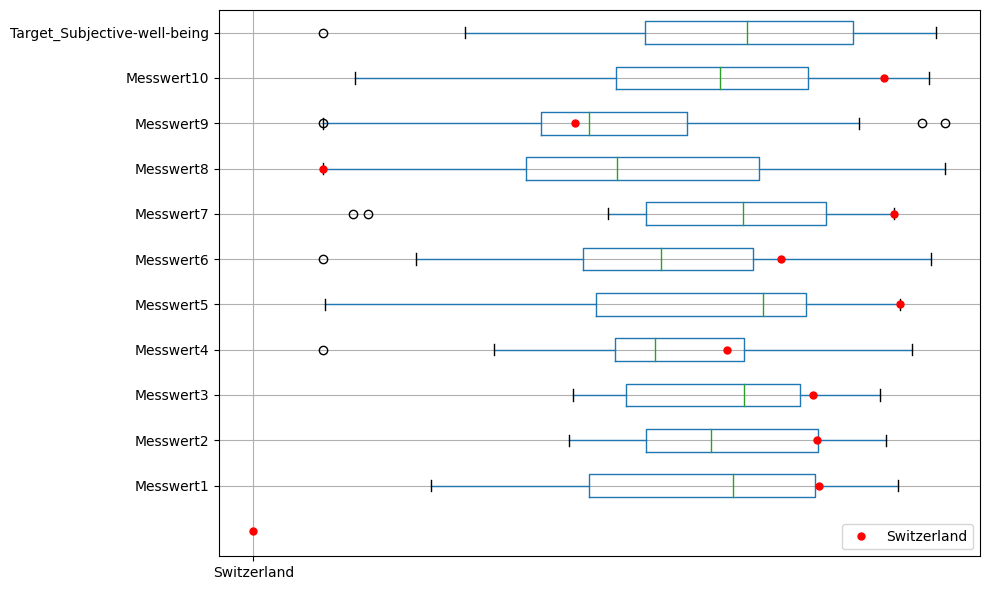

In [26]:
import matplotlib.pyplot as plt

# Box-Whisker-Plots erstellen
plt.figure(figsize=(10, 6))
plt1 = oecd.boxplot(vert=False, showfliers=True, patch_artist=False)

# Werte der Schweiz identifizieren und hervorheben
switzerland_data = oecd[oecd['CountryCode'] == 'CH']

for col in oecd.columns:
    if col not in ['CountryCode', 'Target_Subjective-well-being']:  # CountryCode und Target_Subjective-well-being nicht plotten
        value = switzerland_data[col].values[0]
        plt.plot(value, col, 'ro', markersize=5, label='Switzerland' if col == 'Messwert1' else "")  # Label nur einmal hinzufügen

plt.tight_layout()
plt.legend()
plt.show()


## Regressions-Modell Europa
Nun wäre es spannend zu sehen, ob wir ein europäisches Modell entwickeln können. Denn wir haben alle Daten (Kategorien 1-10) und das Subjectiv Wellbeing (Target Value des Modelles). Wir befüttern das Regressions Modell mit den Daten und überprüfen, ob das Modell das Target erreicht oder nicht.

In [13]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

csv_oecd_cat_overview = "https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/DATA_OECD_Summary-Messwerte1-11.csv"
oecd = pd.read_csv(csv_oecd_cat_overview, sep=';', decimal=',')

**Data Inspection**: Dieser Befehl gibt eine statistische Zusammenfassung der numerischen Spalten im DataFrame oecd zurück und transponiert die Ausgabe, sodass die Statistiken als Zeilen und die Spaltennamen als Spaltenköpfe dargestellt werden.

In [14]:
oecd.shape
oecd.describe().T

,count,mean,std,min,25%,50%,75%,max
Messwert1,28.0,6.503214,1.968344,2.57,4.8525,6.935,8.1100,9.32
Messwert2,28.0,6.689643,1.385626,4.56,5.6725,6.610,8.1550,9.14
Messwert3,28.0,6.871786,1.346174,4.62,5.3800,7.085,7.9000,9.05
Messwert4,28.0,5.957857,1.773192,1.00,5.2275,5.805,7.0825,9.52
Messwert5,28.0,6.480714,2.194785,1.04,4.9475,7.370,7.9875,9.35
Messwert6,28.0,5.835000,1.975100,1.00,4.7650,5.885,7.2200,9.79
Messwert7,28.0,6.863929,1.945152,1.44,5.6725,7.080,8.2775,9.26
Messwert8,28.0,5.741071,2.368727,1.00,3.9375,5.255,7.3050,10.00
Messwert9,28.0,5.292500,2.195495,1.00,4.1575,4.855,6.2625,10.00
Messwert10,28.0,6.511429,2.080145,1.47,5.2400,6.740,8.0175,9.77


**Data Cleaning & Analysis**:
Dieser Python-Code prüft auf fehlende Werte im oecd DataFrame, extrahiert Zielwerte und Ländercodes und erstellt ein Index-Array. Anschliessend werden die Ländercodes und die Indizes in einem Array kombiniert.

In [15]:
# Checking Null values
oecd.isnull().sum()*100/oecd.shape[0]
# define list of (effective) target values from oecd dataframe
oecd_Target =  list(oecd["Target_Subjective-well-being"])
print(oecd_Target)


# define list of Country Codes and (effective) target values from oecd dataframe
oecd_CC =  list(oecd["CountryCode"])
#print(oecd_CC)

# define a simple index array
country_idx=[]
country_idx = [i for i in range(28)]
#print(country_idx)

# combine oecd_CC and country_idx arrays horizontally
country_array = np.stack((oecd_CC, country_idx))
print(country_array[0], country_array[1])



[9.05, 8.64, 6.7, 7.8, 5.92, 9.87, 6.78, 6.56, 3.06, 3.47, 9.22, 7.97, 8.23, 5.82, 5.18, 3.74, 8.0, 9.29, 9.1, 7.48, 3.27, 5.16, 6.64, 6.16, 8.72, 9.46, 1.0, 8.23]
['AT' 'BE' 'CZ' 'DK' 'EE' 'FI' 'FR' 'DE' 'EL' 'HU' 'IS' 'IE' 'IL' 'IT'
 'LV' 'LT' 'LU' 'NL' 'NO' 'PL' 'PT' 'SK' 'SI' 'ES' 'SE' 'CH' 'TR' 'UK'] ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27']


**Erstellung vom Regressionsmodell:** Wir verwenden scikit-learn, um ein lineares Regressionsmodell zu erstellen, das die Zielvariable Target_Subjective-well-being auf der Grundlage mehrerer Messwerte (Messwert1 bis Messwert10) vorhersagt. Der Code trainiert das Modell, berechnet die Intercept- und Koeffizientenwerte und speichert diese in einem Dictionary, das die Merkmale und ihre entsprechenden Koeffizienten enthält.

In [28]:
from sklearn.linear_model import LinearRegression
feature_names = ['Messwert1', 'Messwert2', 'Messwert3', 'Messwert4', 'Messwert5', 'Messwert6', 'Messwert7', 'Messwert8', 'Messwert9', 'Messwert10']

X = oecd[feature_names].values
y = oecd['Target_Subjective-well-being'].values

# compute linear regression model
model = LinearRegression()

model.fit(X, y)

model.intercept_, model.coef_ , model.n_features_in_
# define dictionary with feature names and their corresponding (linear regression) coefficients
model_dictionary = {feature_names[i]:list(model.coef_)[i] for i in range(len(feature_names))}

print(model_dictionary)

{'Messwert1': 0.3040470486216113, 'Messwert2': -0.0877654086512677, 'Messwert3': -0.3829753023461222, 'Messwert4': 0.04249451012367498, 'Messwert5': 0.36114226799928983, 'Messwert6': 0.39508917574991104, 'Messwert7': 0.8082331335640411, 'Messwert8': 0.12715049196963055, 'Messwert9': -0.12824801176031986, 'Messwert10': -0.21210252283758418}


**Anwendung vom Regressions-Modell:** Wir verwenden das trainierte lineare Regressionsmodell, um den Wert der Zielvariable Target_Subjective-well-being für ein bestimmtes Land (in diesem Fall Schweiz) vorherzusagen. Der Code extrahiert die relevanten Daten für das Land, entfernt die Zielvariable und verwendet die verbleibenden Daten, um eine Vorhersage zu treffen. Schließlich wird die Vorhersage mit dem tatsächlichen Wert verglichen und die Differenz (Residuum) berechnet.

In [31]:
# Finden der Zeile, die die Daten für die Schweiz enthält
switzerland_idx = oecd[oecd['CountryCode'] == 'CH'].index[0]
oecd_entry = list(oecd.loc[switzerland_idx, :])   # country data row for Switzerland
print(oecd_entry)

# Entfernen der ersten zwei Spalten (Land und Ländercode)
del oecd_entry[:2]

# Entfernen des Zielwerts und Speichern
oecd_entry_target = oecd_entry.pop()
print(f"removing: {oecd_entry_target}")

# Neue Daten für die Vorhersage vorbereiten (nur Merkmalswerte)
new_data = np.array([oecd_entry]).reshape(1, -1)
print(f"New Data: {new_data}")

# Vorhersage der Zielvariable ("Subjective-well-being")
predicted_target = model.predict(new_data)
print(f"Real target value: \t\t{oecd_entry_target}, \nPredicted target value: \t{predicted_target[0]}, \nResidual: \t\t\t{oecd_entry_target - predicted_target[0]}")


['Switzerland', 'CH', 8.17, 8.15, 8.08, 6.84, 9.35, 7.62, 9.26, 1.0, 4.65, 9.11, 9.46]
removing: 9.46
New Data: [[8.17 8.15 8.08 6.84 9.35 7.62 9.26 1.   4.65 9.11]]
Real target value: 		9.46, 
Predicted target value: 	9.364113222424923, 
Residual: 			0.09588677757507824


**Vergleich (durch Regression) des vorhergesagten Zielwerts mit dem tatsächlichen Zielwert für jedes Land**:
Wir vergleichen die tatsächlichen Werte der Zielvariable Target_Subjective-well-being mit den vom linearen Regressionsmodell vorhergesagten Werten für alle Länder im oecd DataFrame. Die tatsächlichen und vorhergesagten Werte werden extrahiert und in Listen gespeichert, die anschließend geplottet werden, um den Vergleich zu visualisieren.

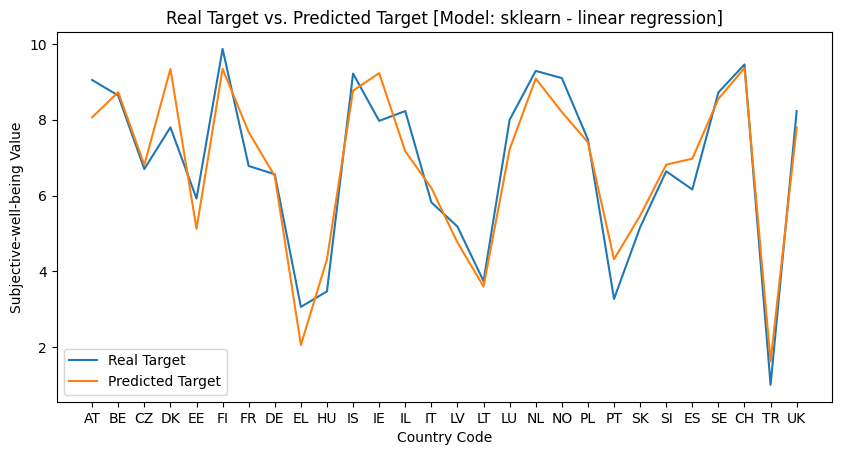

In [ ]:
y_target = []
y_target_predicted = []

idx_max = 29  # no of countries in dataframe oecd

for idx in range(0,idx_max-1):
  oecd_idx = list(oecd.loc[idx, :])
  del oecd_idx[:2]

  y_target.append(oecd_idx.pop())

  new_data = np.array([oecd_idx]).reshape(1,-1)
  y_target_predicted.append(float(model.predict(new_data)[0]))

plt.figure().set_figwidth(10)

plt.plot(oecd_CC, y_target, label='Real Target')
plt.plot(y_target_predicted, label='Predicted Target')

plt.ylabel("Subjective-well-being Value")
plt.xlabel("Country Code")
plt.legend()
plt.title('Real Target vs. Predicted Target [Model: sklearn - linear regression]')

plt.savefig("Linear-Regression_Real-vs-Predicted-Target.png")
plt.show()

## Regressions-Modell Scandic
Nun wäre es spannend zu sehen, ob wir ein skandinavisches Modell entwickeln können. Denn wir haben alle Daten (Kategorien 1-10) und das Subjectiv Wellbeing (Target Value des Modelles). Wir befüttern das Regressions Modell mit den Daten und überprüfen, ob das Modell das Target erreicht oder nicht.

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

csv_oecd_cat_overview = "https://raw.githubusercontent.com/brunryan/bina-leistungsnachweis/main/DATA_OECD_Summary-Messwerte1-11.csv"
oecd = pd.read_csv(csv_oecd_cat_overview, sep=';', decimal=',')

**Data Inspection**: Dieser Befehl gibt eine statistische Zusammenfassung der numerischen Spalten im DataFrame oecd zurück und transponiert die Ausgabe, sodass die Statistiken als Zeilen und die Spaltennamen als Spaltenköpfe dargestellt werden.

In [ ]:
oecd.shape
oecd.describe().T

,count,mean,std,min,25%,50%,75%,max
Messwert1,28.0,6.503214,1.968344,2.57,4.8525,6.935,8.1100,9.32
Messwert2,28.0,6.689643,1.385626,4.56,5.6725,6.610,8.1550,9.14
Messwert3,28.0,6.871786,1.346174,4.62,5.3800,7.085,7.9000,9.05
Messwert4,28.0,5.957857,1.773192,1.00,5.2275,5.805,7.0825,9.52
Messwert5,28.0,6.480714,2.194785,1.04,4.9475,7.370,7.9875,9.35
Messwert6,28.0,5.835000,1.975100,1.00,4.7650,5.885,7.2200,9.79
Messwert7,28.0,6.863929,1.945152,1.44,5.6725,7.080,8.2775,9.26
Messwert8,28.0,5.741071,2.368727,1.00,3.9375,5.255,7.3050,10.00
Messwert9,28.0,5.292500,2.195495,1.00,4.1575,4.855,6.2625,10.00
Messwert10,28.0,6.511429,2.080145,1.47,5.2400,6.740,8.0175,9.77


**Data Cleaning & Analysis**:
Dieser Python-Code prüft auf fehlende Werte im oecd DataFrame, extrahiert Zielwerte und Ländercodes und erstellt ein Index-Array. Anschliessend werden die Ländercodes und die Indizes in einem Array kombiniert.

In [ ]:
# Checking Null values
oecd.isnull().sum()*100/oecd.shape[0]
# define list of (effective) target values from oecd dataframe
oecd_Target =  list(oecd["Target_Subjective-well-being"])
print(oecd_Target)


# define list of Country Codes and (effective) target values from oecd dataframe
oecd_CC =  list(oecd["CountryCode"])
#print(oecd_CC)

# define a simple index array
country_idx=[]
country_idx = [i for i in range(28)]
#print(country_idx)

# combine oecd_CC and country_idx arrays horizontally
country_array = np.stack((oecd_CC, country_idx))
print(country_array[0], country_array[1])



[9.05, 8.64, 6.7, 7.8, 5.92, 9.87, 6.78, 6.56, 3.06, 3.47, 9.22, 7.97, 8.23, 5.82, 5.18, 3.74, 8.0, 9.29, 9.1, 7.48, 3.27, 5.16, 6.64, 6.16, 8.72, 9.46, 1.0, 8.23]
['AT' 'BE' 'CZ' 'DK' 'EE' 'FI' 'FR' 'DE' 'EL' 'HU' 'IS' 'IE' 'IL' 'IT'
 'LV' 'LT' 'LU' 'NL' 'NO' 'PL' 'PT' 'SK' 'SI' 'ES' 'SE' 'CH' 'TR' 'UK'] ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27']


**Erstellung vom Regressionsmodell:** Wir verwenden scikit-learn, um ein lineares Regressionsmodell zu erstellen, das die Zielvariable Target_Subjective-well-being auf der Grundlage mehrerer Messwerte (Messwert1 bis Messwert10) vorhersagt. Der Code trainiert das Modell, berechnet die Intercept- und Koeffizientenwerte und speichert diese in einem Dictionary, das die Merkmale und ihre entsprechenden Koeffizienten enthält.

In [34]:
from sklearn.linear_model import LinearRegression
feature_names = ['Messwert1', 'Messwert2', 'Messwert3', 'Messwert4', 'Messwert5', 'Messwert6', 'Messwert7', 'Messwert8', 'Messwert9', 'Messwert10']

X = oecd[feature_names].values
y = oecd['Target_Subjective-well-being'].values

# compute linear regression model
model = LinearRegression()

model.fit(X, y)

model.intercept_, model.coef_ , model.n_features_in_
# define dictionary with feature names and their corresponding (linear regression) coefficients
model_dictionary = {feature_names[i]:list(model.coef_)[i] for i in range(len(feature_names))}

print(model_dictionary)

{'Messwert1': 0.3040470486216113, 'Messwert2': -0.0877654086512677, 'Messwert3': -0.3829753023461222, 'Messwert4': 0.04249451012367498, 'Messwert5': 0.36114226799928983, 'Messwert6': 0.39508917574991104, 'Messwert7': 0.8082331335640411, 'Messwert8': 0.12715049196963055, 'Messwert9': -0.12824801176031986, 'Messwert10': -0.21210252283758418}


**Anwendung vom Regressions-Modell:** Wir verwenden das trainierte lineare Regressionsmodell, um den Wert der Zielvariable Target_Subjective-well-being für ein bestimmtes Land (in diesem Fall Schweiz) vorherzusagen. Der Code extrahiert die relevanten Daten für das Land, entfernt die Zielvariable und verwendet die verbleibenden Daten, um eine Vorhersage zu treffen. Schließlich wird die Vorhersage mit dem tatsächlichen Wert verglichen und die Differenz (Residuum) berechnet.

In [ ]:
# Finden der Zeile, die die Daten für die Schweiz enthält
switzerland_idx = oecd[oecd['CountryCode'] == 'CH'].index[0]
oecd_entry = list(oecd.loc[switzerland_idx, :])   # country data row for Switzerland
print(oecd_entry)

# Entfernen der ersten zwei Spalten (Land und Ländercode)
del oecd_entry[:2]

# Entfernen des Zielwerts und Speichern
oecd_entry_target = oecd_entry.pop()
print(f"removing: {oecd_entry_target}")

# Neue Daten für die Vorhersage vorbereiten (nur Merkmalswerte)
new_data = np.array([oecd_entry]).reshape(1, -1)
print(f"New Data: {new_data}")

# Vorhersage der Zielvariable ("Subjective-well-being")
predicted_target = model.predict(new_data)
print(f"Real target value: \t\t{oecd_entry_target}, \nPredicted target value: \t{predicted_target[0]}, \nResidual: \t\t\t{oecd_entry_target - predicted_target[0]}")


['Switzerland', 'CH', 8.17, 8.15, 8.08, 6.84, 9.35, 7.62, 9.26, 1.0, 4.65, 9.11, 9.46]
removing: 9.46
New Data: [[8.17 8.15 8.08 6.84 9.35 7.62 9.26 1.   4.65 9.11]]
Real target value: 		9.46, 
Predicted target value: 	9.364113222424923, 
Residual: 			0.09588677757507824


**Vergleich (durch Regression) des vorhergesagten Zielwerts mit dem tatsächlichen Zielwert für jedes Land**:
Wir vergleichen die tatsächlichen Werte der Zielvariable Target_Subjective-well-being mit den vom linearen Regressionsmodell vorhergesagten Werten für alle Länder im oecd DataFrame. Die tatsächlichen und vorhergesagten Werte werden extrahiert und in Listen gespeichert, die anschließend geplottet werden, um den Vergleich zu visualisieren.

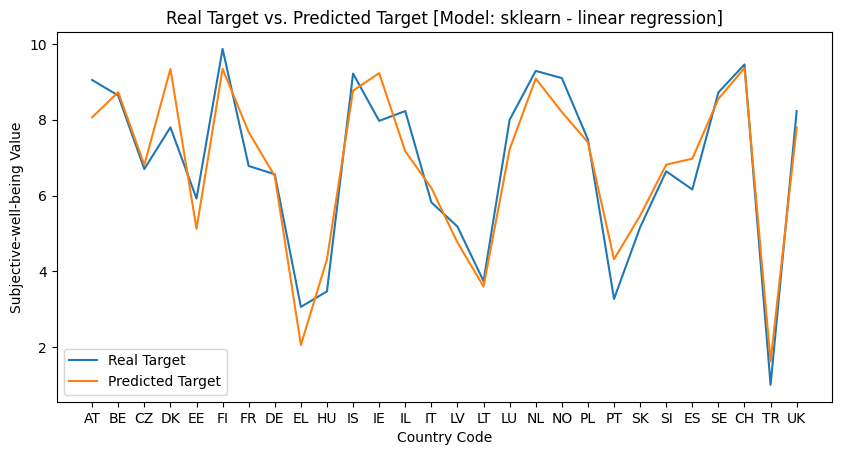

In [ ]:
y_target = []
y_target_predicted = []

idx_max = 29  # no of countries in dataframe oecd

for idx in range(0,idx_max-1):
  oecd_idx = list(oecd.loc[idx, :])
  del oecd_idx[:2]

  y_target.append(oecd_idx.pop())

  new_data = np.array([oecd_idx]).reshape(1,-1)
  y_target_predicted.append(float(model.predict(new_data)[0]))

plt.figure().set_figwidth(10)

plt.plot(oecd_CC, y_target, label='Real Target')
plt.plot(y_target_predicted, label='Predicted Target')

plt.ylabel("Subjective-well-being Value")
plt.xlabel("Country Code")
plt.legend()
plt.title('Real Target vs. Predicted Target [Model: sklearn - linear regression]')

plt.savefig("Linear-Regression_Real-vs-Predicted-Target.png")
plt.show()

## Pairplot -> TO DELETE

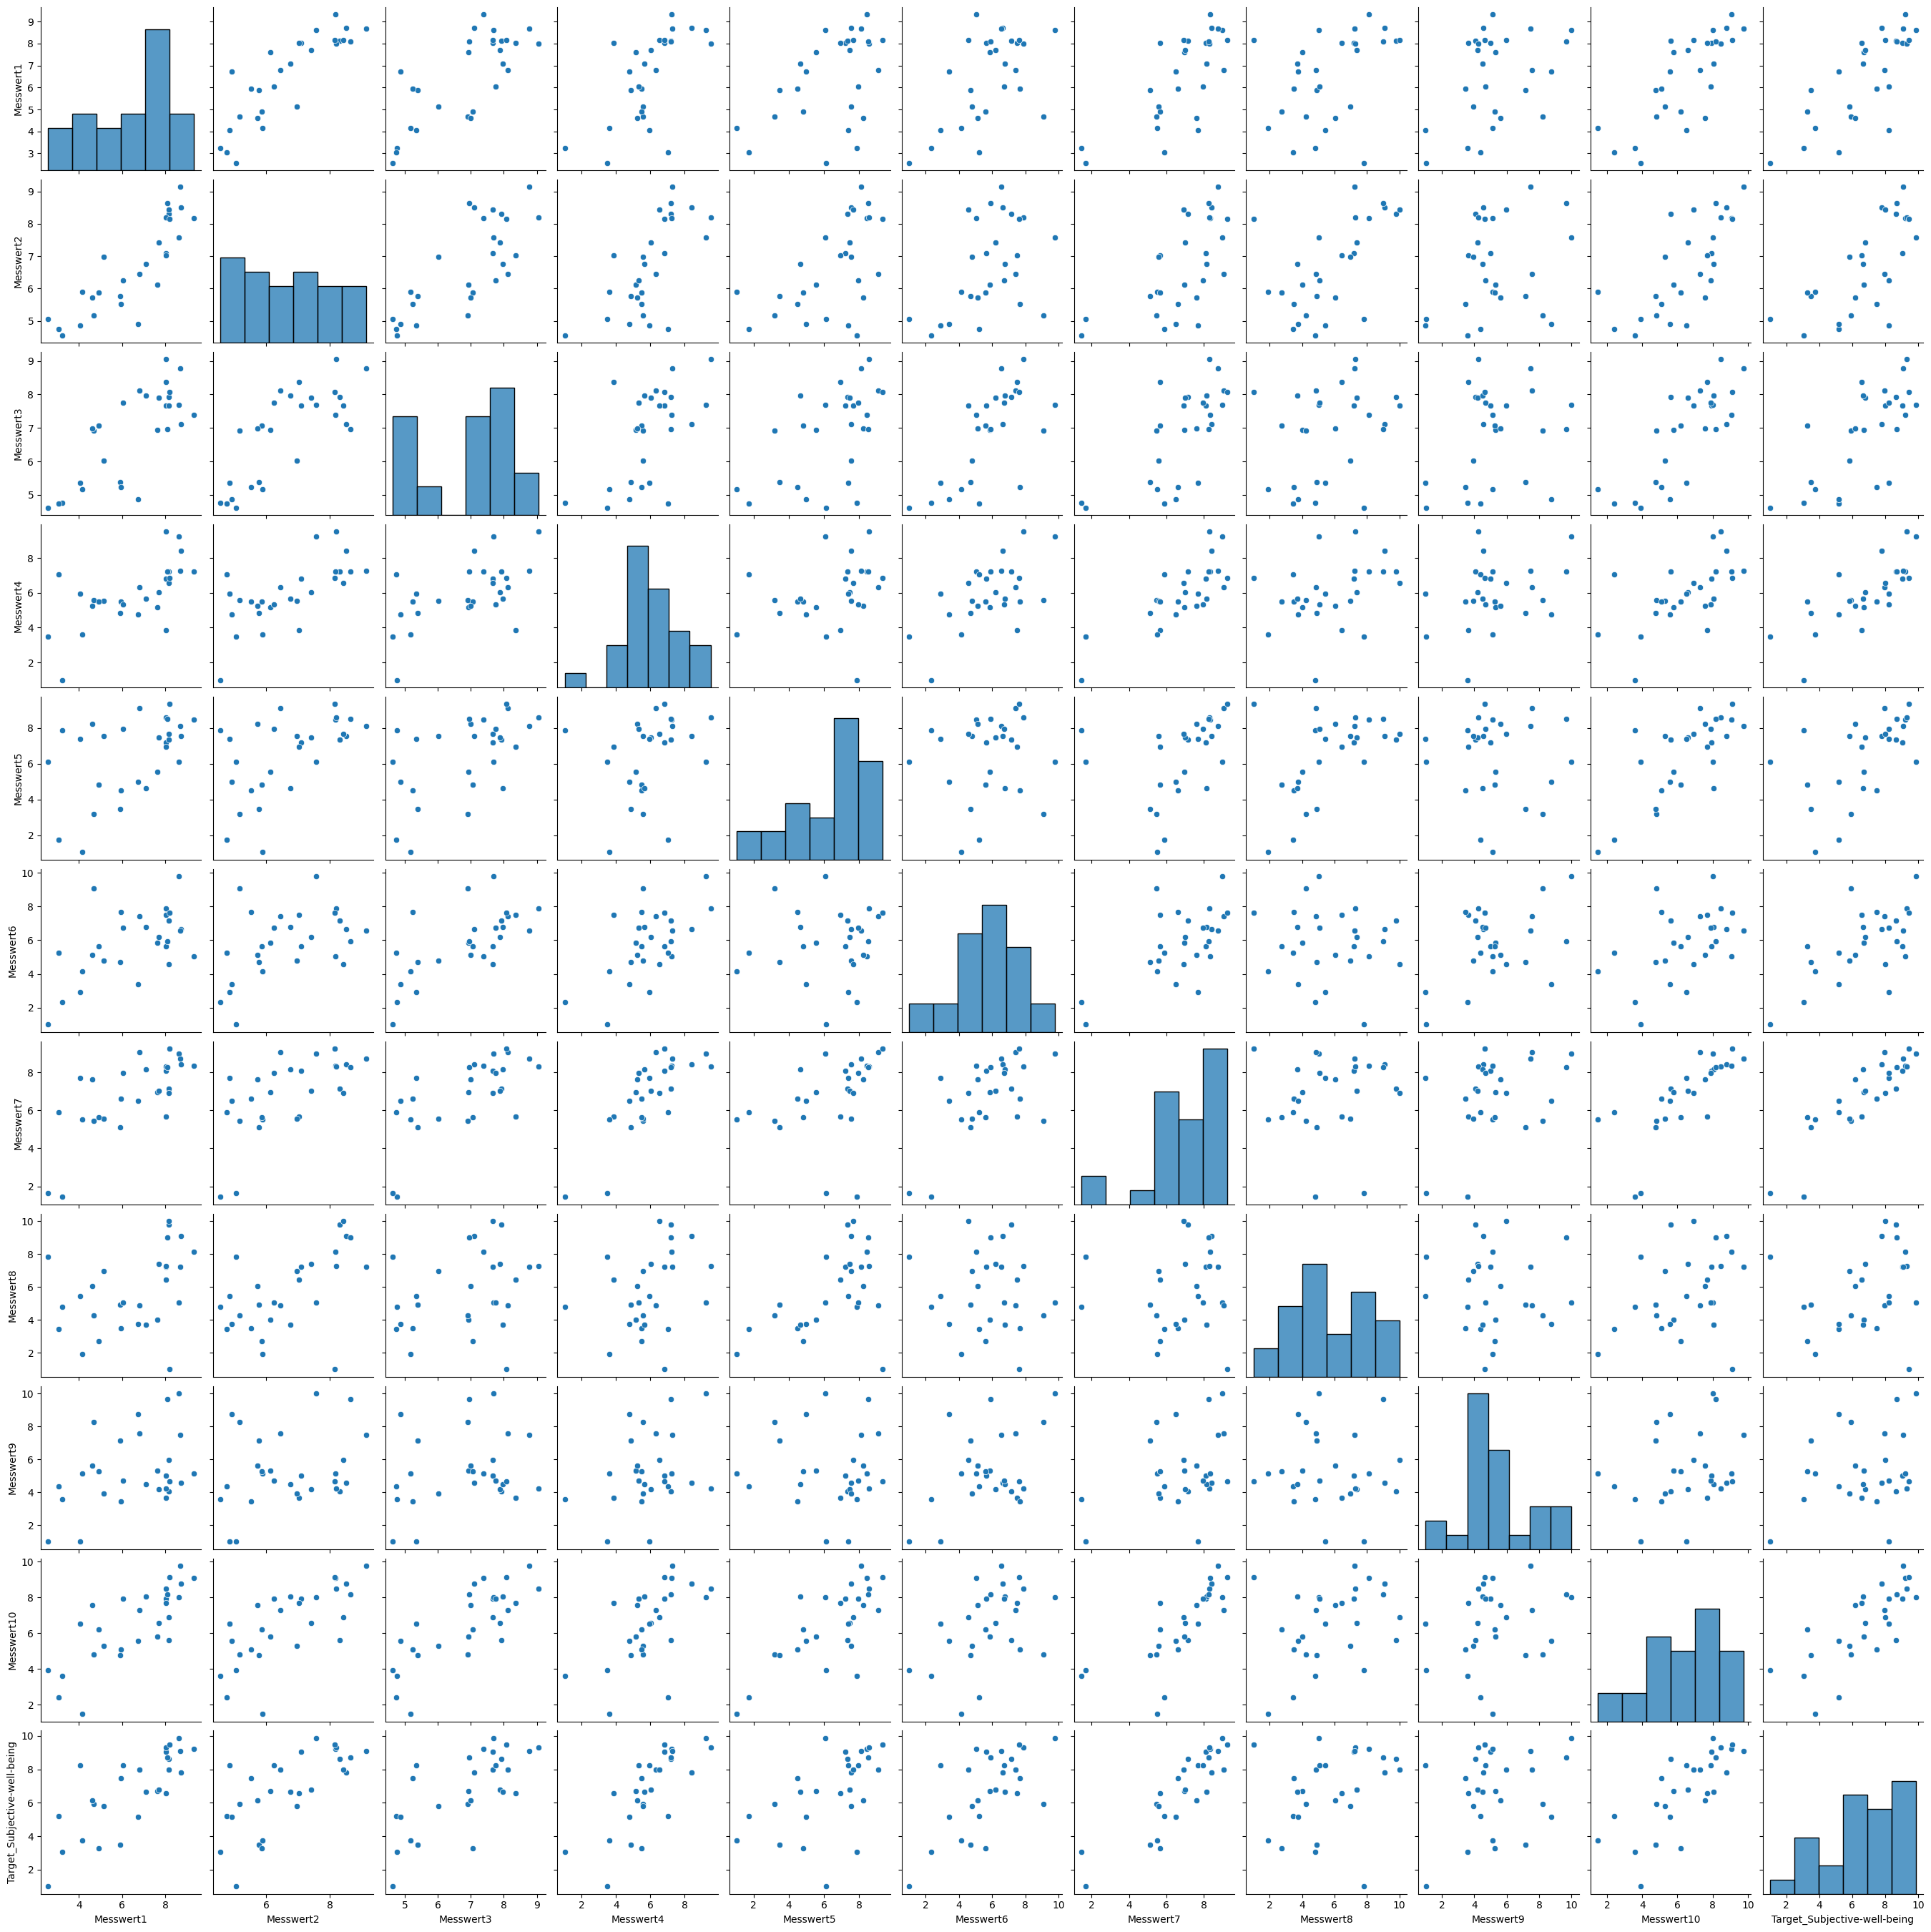

In [ ]:
sns.pairplot(oecd)

# Step 5: Making data-driven decisions

**Step 4 – Presenting information:**  

This is about communicating the information extracted. the focus here is on getting the right information, in the right format, to the right people, at the right time.

**4.1 Decide what type of report (frequency, outlet, and how to show the data)**

**4.2 Starting with the question**

**4.3 Using headlines**

**4.4 Using effective visuals**

**4.5 Using narratives to support visuals**

**4.6 Getting the most out of self-service tools**